### In this Notebook
### We are performing the Exploratory Data Analysis for the given dataset of the housing data
** Are target variable ultimately is the house prices and all the analysis is keeping the feature SalePrice in mind**

** The EDA(Exploratory Data Analysis) is aided with the help of Visualization**

# Importing all the necessary libraries for this task

In [1]:
import numpy as np #Used for Linear Algebra tools
import pandas as pd #Used for better storage and handling of the data
import sklearn #Used for running the machine learning models
import matplotlib.pyplot as plt #Used for Visualization
%matplotlib inline
#Helps embedding the Plots in this Notebook
from sklearn.model_selection import train_test_split #Used for Splitting the Data in Training and Test Splits
import seaborn as sns #Another library based on matplotlib, with more powerful visualization tools


# Getting the data

In [2]:
data_train = pd.read_csv('train.csv') #Reads the training data

In [3]:
data_train.head() #A sneak peak into the data collected

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_train.shape #The dimensions of the training data

(1460, 81)

In [5]:
data_train.describe() #describe is a predefined function, which gives some basic analysis of the data

/home/saransh/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data_train #The complete dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
data_train.columns #All the features of the training_data listed

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
print ("Some statistics of housing price are : \n")
print (data_train['SalePrice'].describe())
print ('\nThe median of the Housing Price is : ',data_train['SalePrice'].median(axis=0))
#Displaying the statistics, centered around our variable of interest that is SalePrice

Some statistics of housing price are : 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The median of the Housing Price is :  163000.0


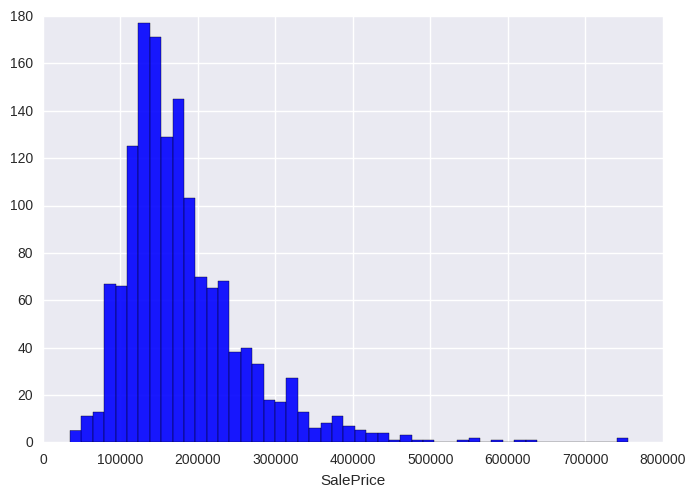

In [9]:
sns.distplot(data_train['SalePrice'], kde=False, color='b', hist_kws={'alpha':0.9}) #Visualization of the SalePrice

# Numerical Features

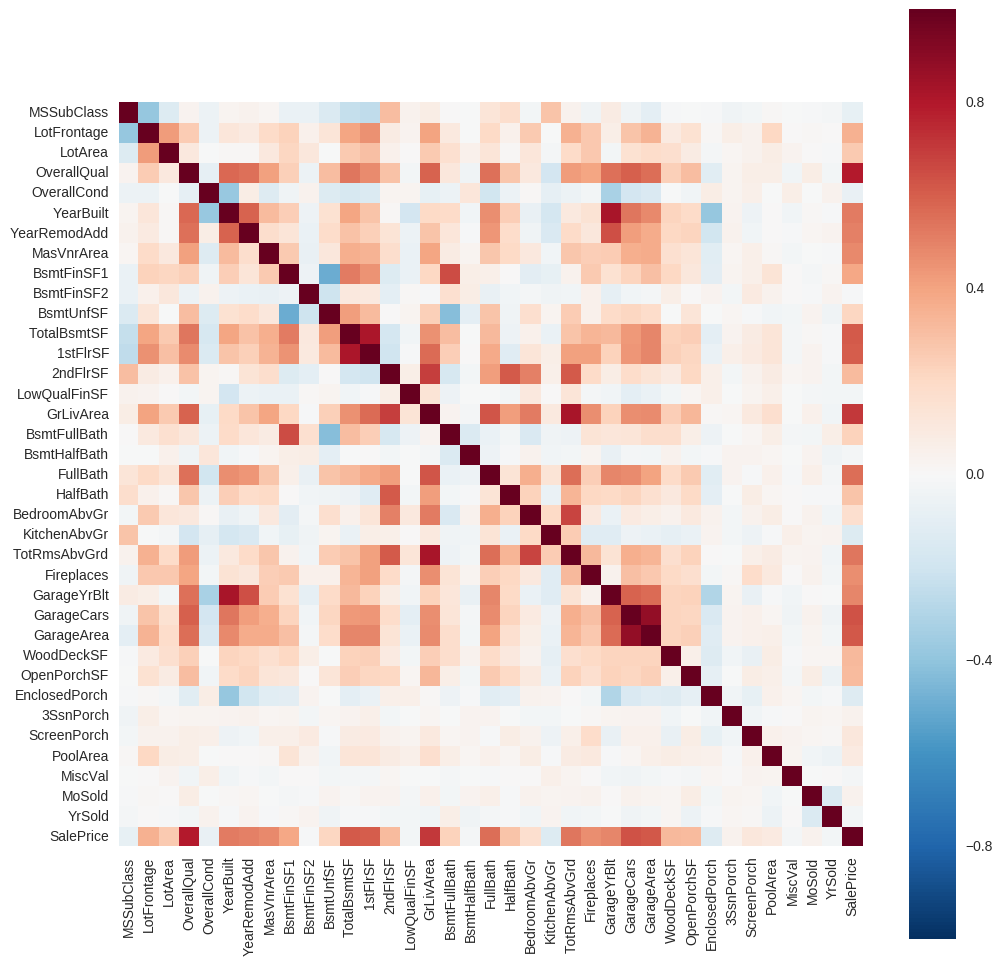

In [10]:
#Fetching all the numerical data for Analysis

corr = data_train.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1,square=True)
#A Powerful visualization to sense the correlatin between the different features

In [11]:
cor_dict = corr['SalePrice'].to_dict() #Getting the correlations of SalePrice with all the other features

In [12]:
del cor_dict['SalePrice']  #Dropping the correlation of SalePrice with SalePrice, as it is meaningless

In [13]:
cor_dict #Displaing the correlations

{'1stFlrSF': 0.6058521846919166,
 '2ndFlrSF': 0.31933380283206614,
 '3SsnPorch': 0.044583665335747917,
 'BedroomAbvGr': 0.16821315430074149,
 'BsmtFinSF1': 0.38641980624215627,
 'BsmtFinSF2': -0.011378121450215216,
 'BsmtFullBath': 0.22712223313149718,
 'BsmtHalfBath': -0.016844154297359294,
 'BsmtUnfSF': 0.214479105546969,
 'EnclosedPorch': -0.12857795792595636,
 'Fireplaces': 0.46692883675152419,
 'FullBath': 0.5606637627484452,
 'GarageArea': 0.62343143891835984,
 'GarageCars': 0.64040919725834899,
 'GarageYrBlt': 0.48636167748786213,
 'GrLivArea': 0.70862447761265113,
 'HalfBath': 0.2841076755947784,
 'KitchenAbvGr': -0.13590737084214169,
 'LotArea': 0.26384335387140628,
 'LotFrontage': 0.35179909657067854,
 'LowQualFinSF': -0.025606130000680152,
 'MSSubClass': -0.08428413512659523,
 'MasVnrArea': 0.47749304709571072,
 'MiscVal': -0.021189579640303789,
 'MoSold': 0.046432245223819363,
 'OpenPorchSF': 0.31585622711605577,
 'OverallCond': -0.077855894048677599,
 'OverallQual': 0.7909

In [14]:
for ele in sorted(cor_dict.items(), key= lambda x: -abs(x[1])):
    print('{0}: \t{1}'.format(*ele))  #Sorting the correlations in the descending order to get the most significant features

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCond: 	-0.0778558940486776
MoSold: 	0.04643224522381936
3SsnPorch: 	0.044583665335

The housing price correlates strongly with **OverallQual, GrLivArea(GarageCars), GargeArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GargeYrBlt, MasVnrArea and Fireplaces.** But some of those features are highly correlated among each others.

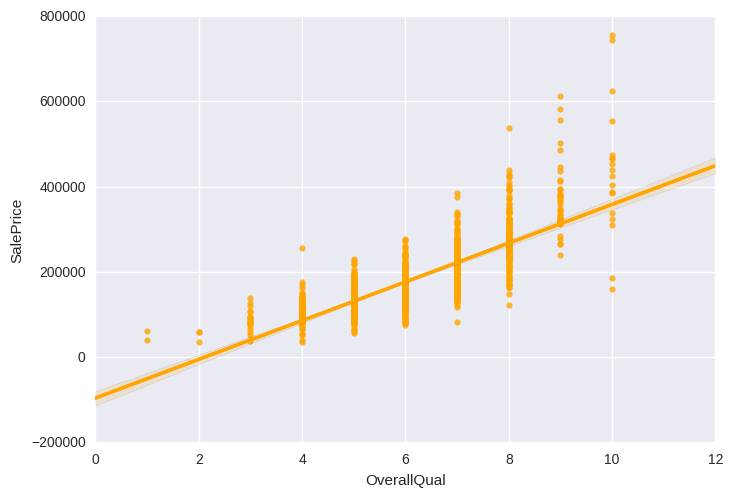

In [15]:
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = data_train, color = 'Orange') 
# Visualization of the OverallQual(The most correlated, hence most important feature with the SalePrice)

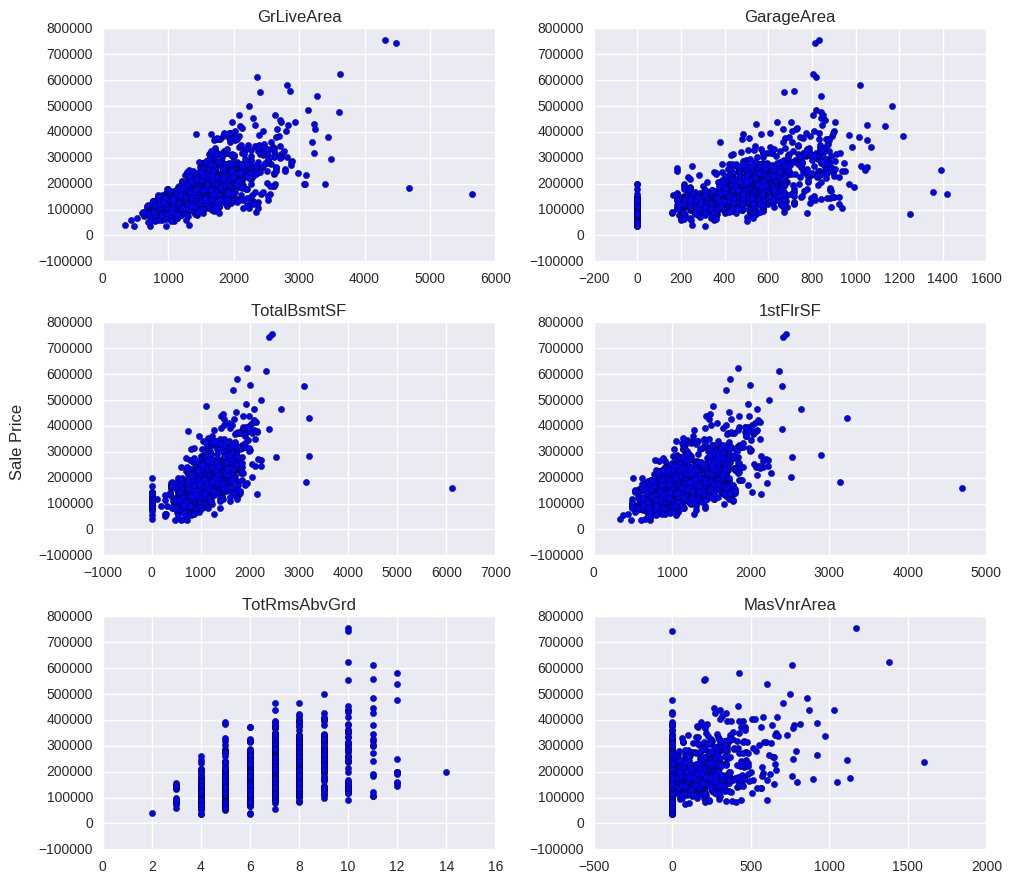

In [16]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9)) #Making a pyplot and dividing in the form of a 3X2 division for better represenatation
price = data_train.SalePrice.values
axarr[0, 0].scatter(data_train.GrLivArea.values, price)
axarr[0, 0].set_title('GrLiveArea')
axarr[0, 1].scatter(data_train.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(data_train.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(data_train['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(data_train.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(data_train.MasVnrArea.values, price)
axarr[2, 1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

#Visualizing all the other important features with the SalePrice

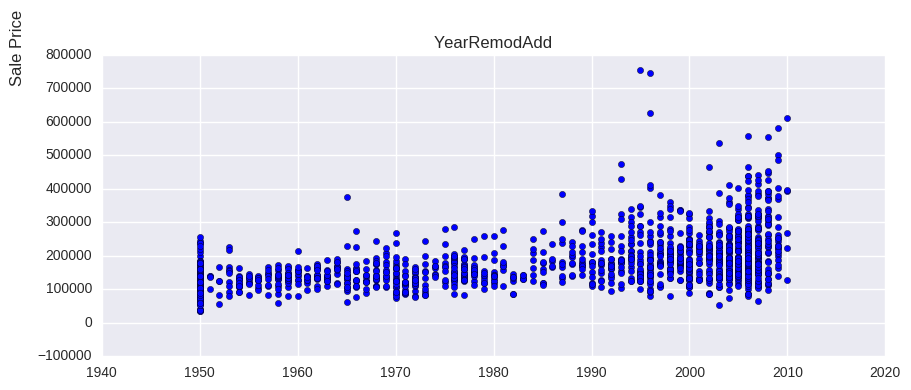

In [17]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(121)
plt.scatter(data_train.YearBuilt.values, price)
plt.title('YearBuilt') # Looking at the effect of the Year in which a particular house was built and the SalePrice

plt.subplot(212)
plt.scatter(data_train.YearRemodAdd.values, price)
plt.title('YearRemodAdd') # Effect of the Remodulation in the house happening in some particular year and the SalePrice

fig.text(-0.01, 0.5, 'Sale Price', va = 'center', rotation = 'vertical', fontsize = 12) 

plt.tight_layout()

# Categorical Features

In [18]:
print(data_train.select_dtypes(include=['object']).columns.values) #Fetching all the Categorical Data for Anlysis

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


** > Neighbourhood**

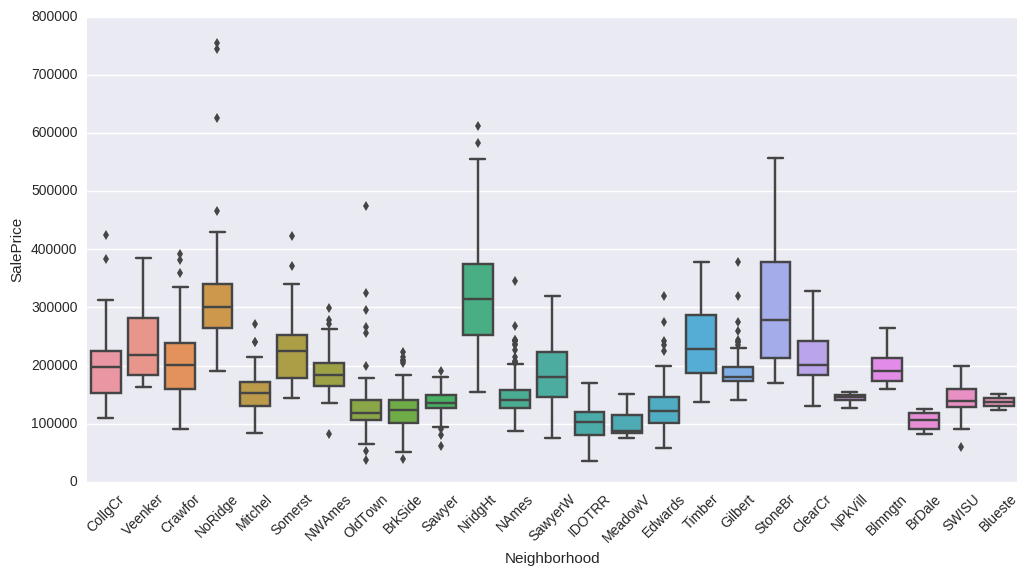

In [19]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = data_train)
xt = plt.xticks(rotation=45) #trying to visualize the effect of the Neighbourhood on the SalePrice(BoxPlots)

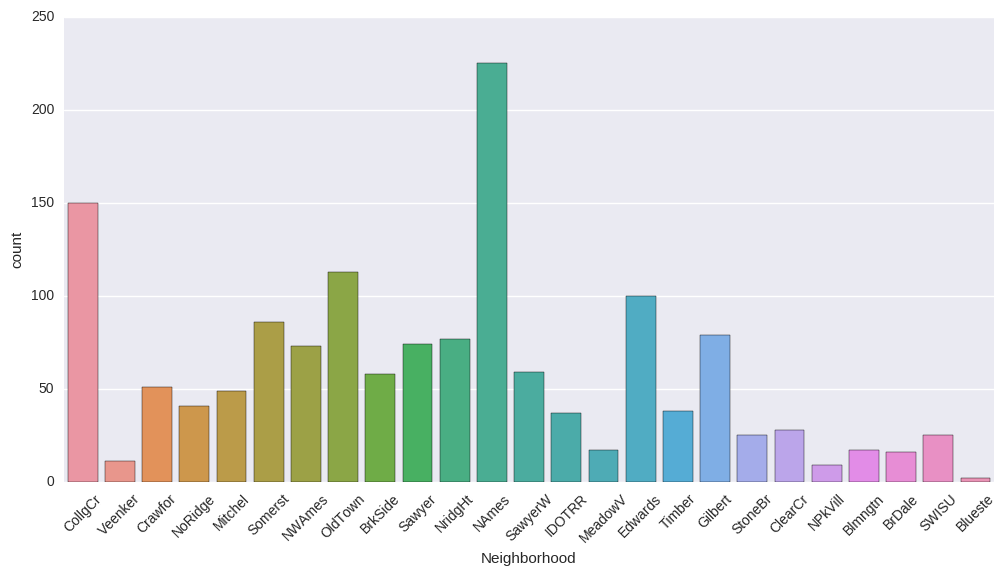

In [20]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = data_train)
xt = plt.xticks(rotation=45) #Visualizing the Number of each Neighbourhood Houses that were sold

Could group those Neighborhoods with similar housing price into a same bucket for dimension-reduction.

### Housing Price vs Sales
* Sales Type & Condition
* Sales Seasonality

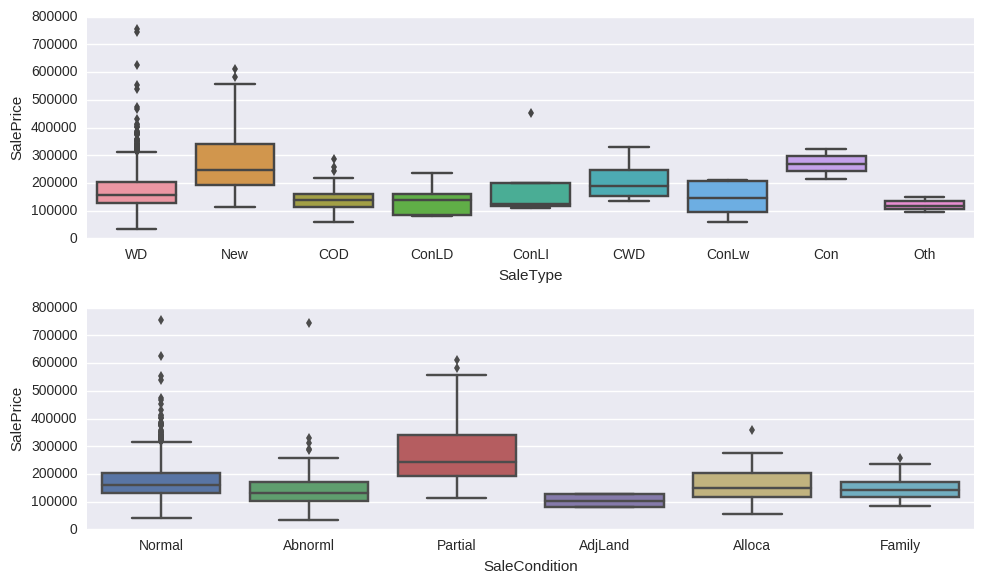

In [21]:
fig, ax = plt.subplots(2, 1, figsize = (10,6))
sns.boxplot(x='SaleType', y='SalePrice', data = data_train, ax=ax[0])
sns.boxplot(x = 'SaleCondition', y= 'SalePrice', data= data_train, ax=ax[1])
plt.tight_layout() #What was the type of sale and the condition of the house during the sale, and how it effected a 
                   #In the price of the house

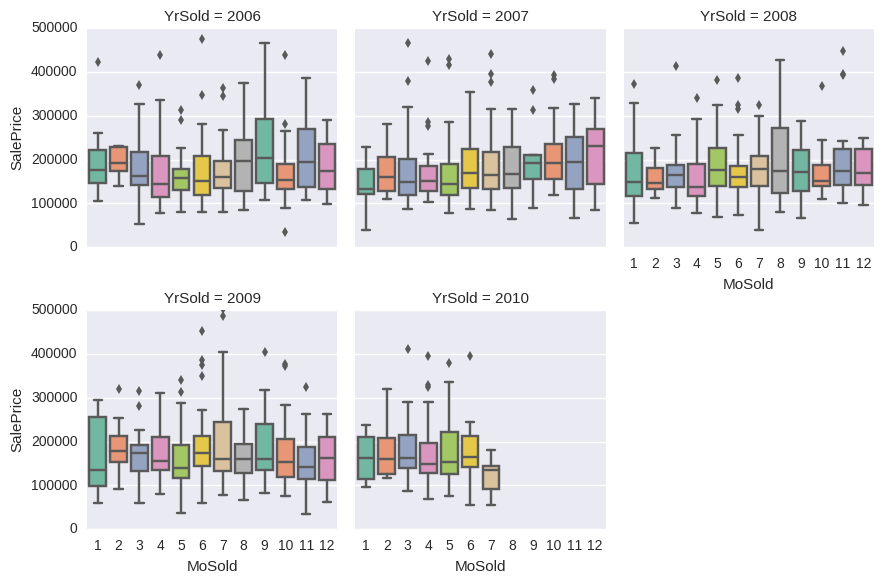

In [22]:
g = sns.FacetGrid(data_train, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout() #Trying to visualize whether there was a change in the SalePrice(a change in trend) depending on
                   # when the house was sold

### We can see that the timing does not hugely affect the house

## Housing Style

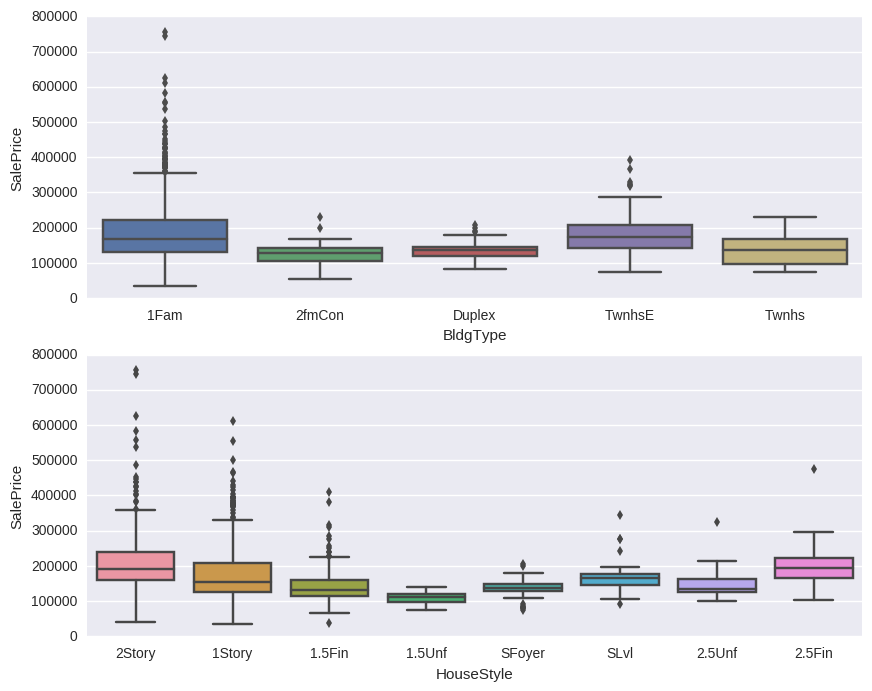

In [23]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = data_train, ax = ax[0])#The type of Building & SalePrice visual.
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data_train, ax = ax[1])#House Style and the SalePrice

### *Housing Condition

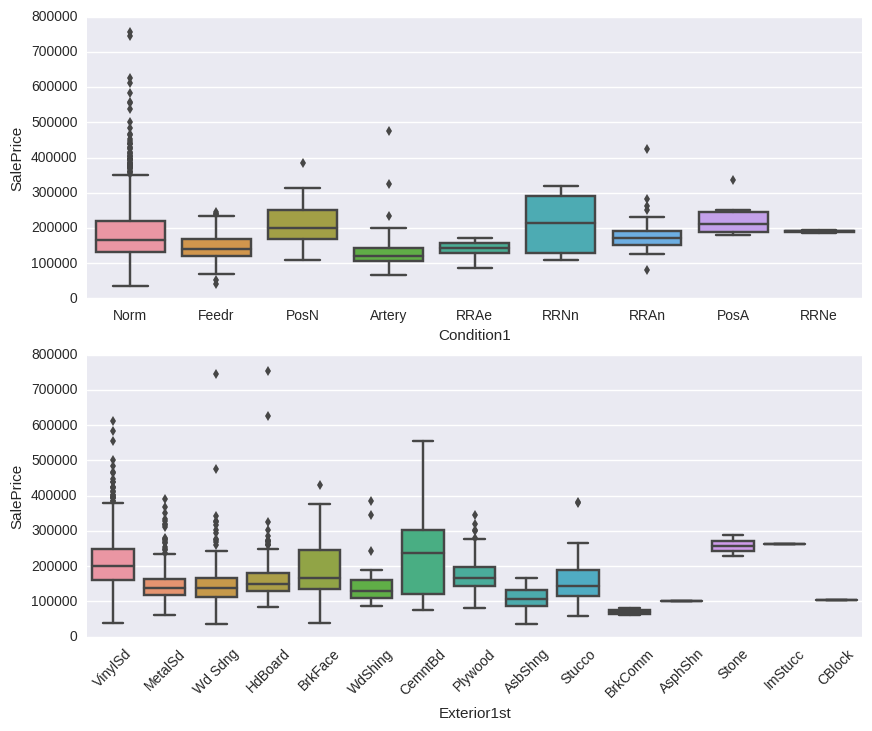

In [24]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = data_train, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = data_train, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

### Basement Condition

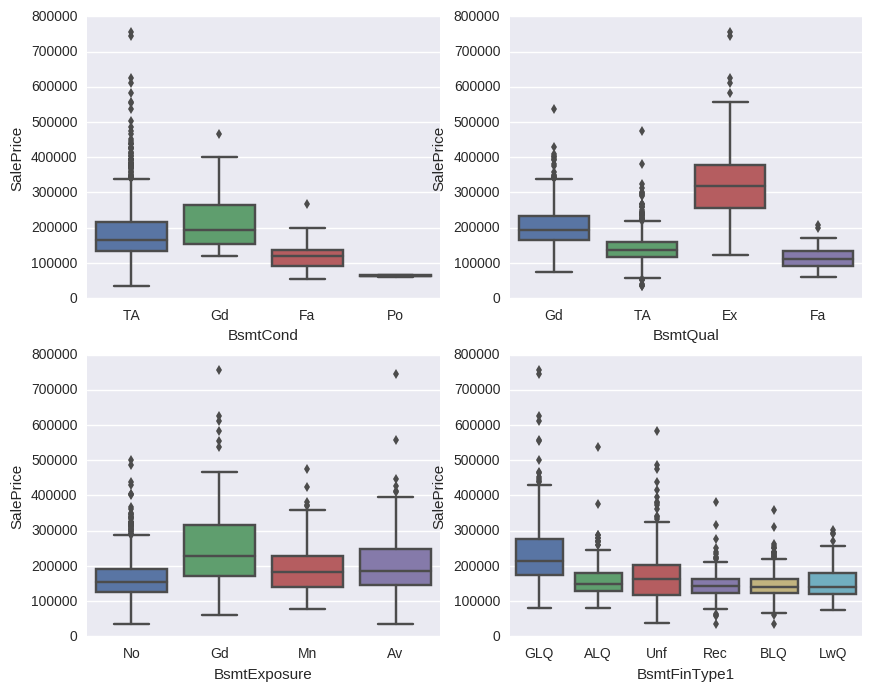

In [25]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = data_train, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = data_train, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = data_train, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = data_train, ax = ax[1, 1])

### Home Functionality

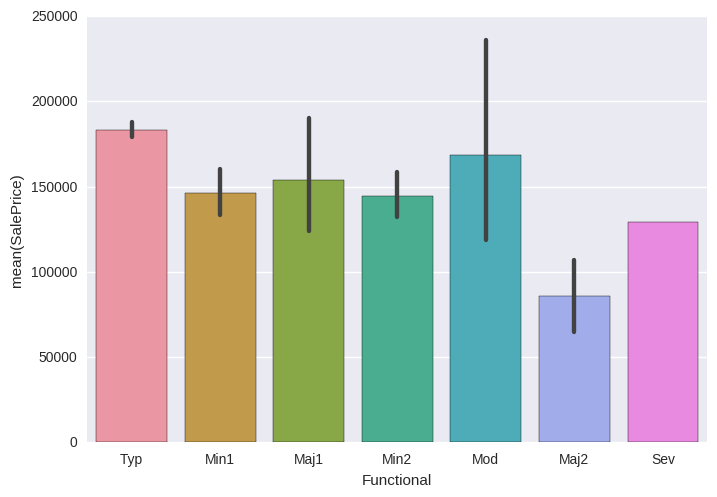

In [26]:
sns.barplot('Functional', 'SalePrice', data = data_train)

* FirePlaceQu

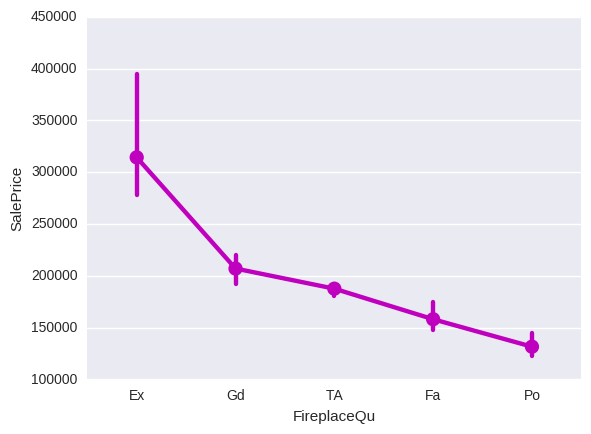

In [27]:
sns.factorplot('FireplaceQu', 'SalePrice', data = data_train, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

In [28]:
pd.crosstab(data_train.Fireplaces, data_train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


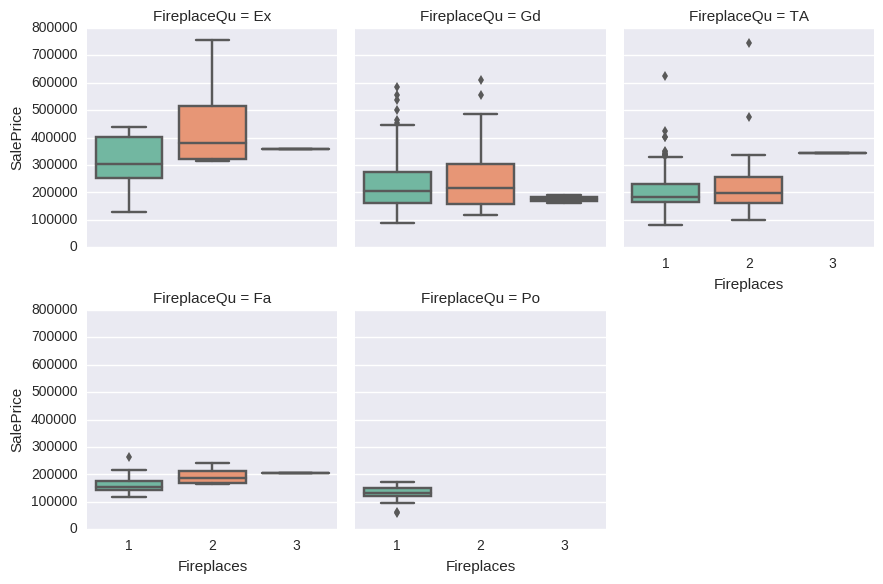

In [29]:
g = sns.FacetGrid(data_train, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

* Heating

The locality where the houses are located is a very cold place. Hence, the Heating Systems are a very important aspect

In [30]:
pd.crosstab(data_train.HeatingQC, data_train.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,8,733
Fa,24,25
Gd,13,228
Po,1,0
TA,49,379


In [31]:
pd.crosstab(data_train.HeatingQC, data_train.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
HeatingQC,,,,,
Ex,22,14,254,4,160
Fa,0,1,13,1,5
Gd,2,3,45,5,57
TA,0,15,68,10,91


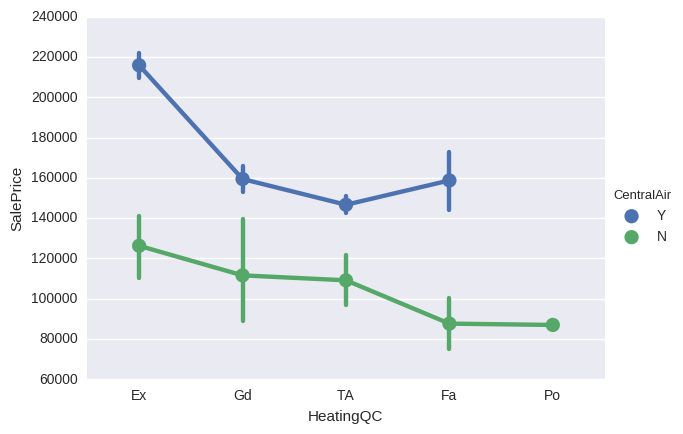

In [32]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = data_train, 
            size = 4.5, aspect = 1.4)

**Having an AC or not has a big impact on the SalePrice**

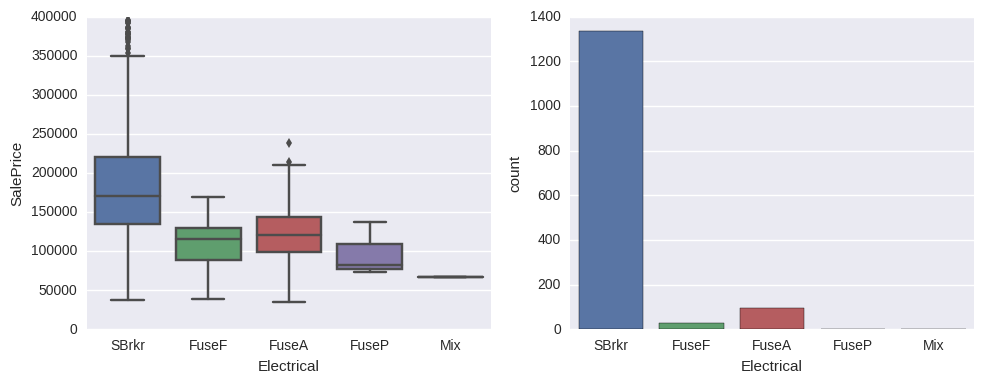

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = data_train, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = data_train)
plt.tight_layout()

* Kitchen Quality

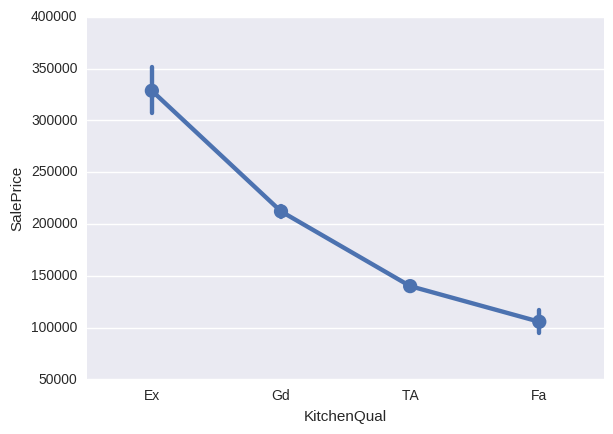

In [34]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = data_train, order = ['Ex', 'Gd', 'TA', 'Fa'])

* MSZoning

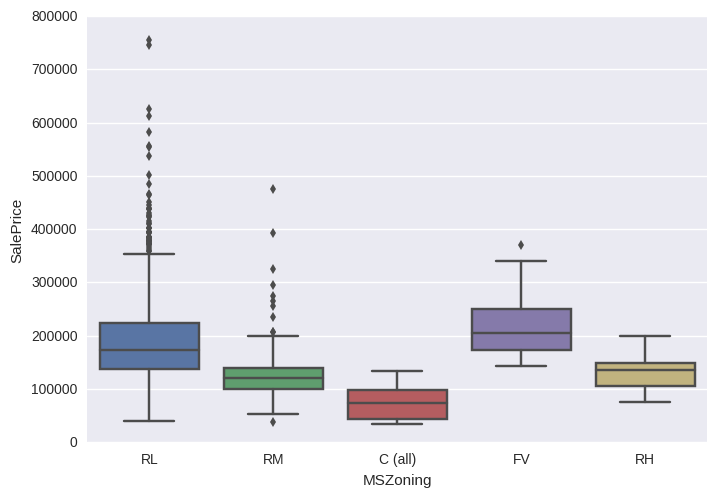

In [35]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = data_train)

* Street & Alley access

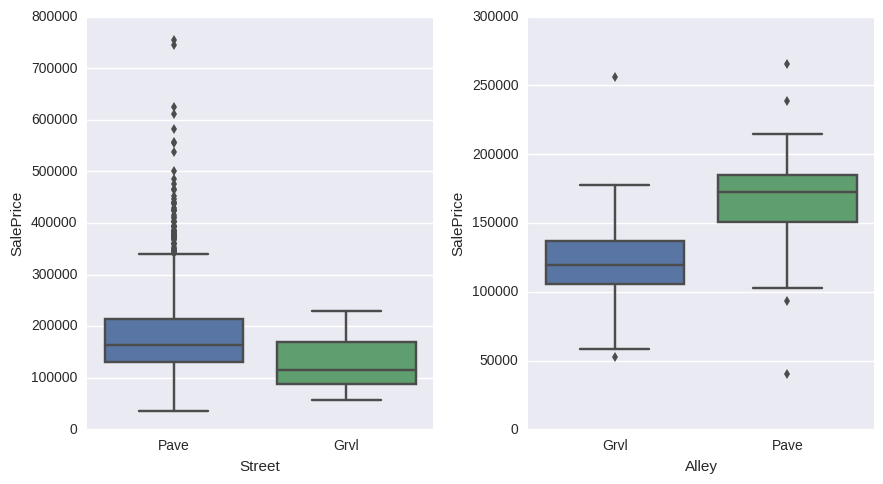

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (9, 5))
sns.boxplot(x = 'Street', y = 'SalePrice', data = data_train, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = data_train, ax = ax[1])
plt.tight_layout()

In [37]:
print("The NA's in Alley is: ", data_train['Alley'].isnull().sum())
print("\nThere are so many NA's in Alley. When Alley is NA, Street = ", 
      data_train[data_train.Alley.notnull()].Street.unique())
print("\n", pd.crosstab(data_train.Street, data_train.Alley))

The NA's in Alley is:  1369

There are so many NA's in Alley. When Alley is NA, Street =  ['Pave']

 Alley   Grvl  Pave
Street            
Pave      50    41
